<a href="https://colab.research.google.com/github/luongdo94/Data-Sciences/blob/main/Pet_Adoption_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/drive/MyDrive/pet_adoption_data.csv')

In [13]:
data.head(5)

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,2,131,3,0,5.039768,1,0,27,140,0,0
1,501,Rabbit,5,73,4,0,16.086727,0,0,8,235,0,0
2,502,Dog,0,136,3,1,2.076286,0,0,85,385,0,0
3,503,Bird,2,97,4,2,3.339423,0,0,61,217,1,0
4,504,Rabbit,5,123,2,0,20.498100,0,0,28,14,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


In [5]:
data.describe()

,PetID,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,1503.000000,92.279522,15.705776,0.701046,0.196313,43.974091,249.142003,0.301943,0.328351
std,579.515315,52.148363,8.327749,0.457914,0.397307,25.740253,142.887040,0.459215,0.469730
min,500.000000,1.000000,1.018198,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1001.500000,48.000000,8.730396,0.000000,0.000000,21.000000,127.000000,0.000000,0.000000
50%,1503.000000,94.000000,15.925416,1.000000,0.000000,45.000000,242.000000,0.000000,0.000000
75%,2004.500000,138.000000,22.737180,1.000000,0.000000,66.000000,375.000000,1.000000,1.000000
max,2506.000000,179.000000,29.995628,1.000000,1.000000,89.000000,499.000000,1.000000,1.000000


In [10]:
data.columns

Index(['PetID', 'PetType', 'Breed', 'AgeMonths', 'Color', 'Size', 'WeightKg',
       'Vaccinated', 'HealthCondition', 'TimeInShelterDays', 'AdoptionFee',
       'PreviousOwner', 'AdoptionLikelihood'],
      dtype='object')

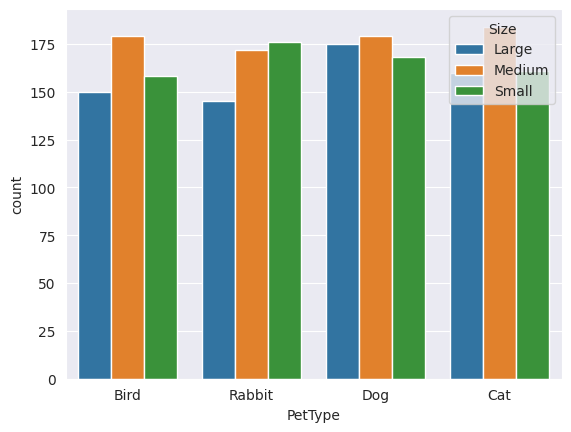

In [39]:
sns.set_style('darkgrid')
sns.countplot(x='PetType',data=data, hue=Size);

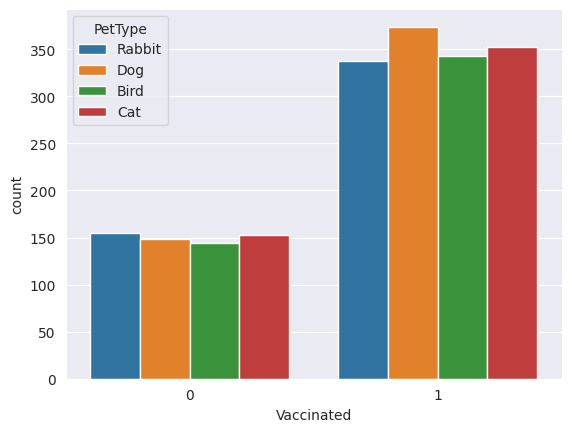

In [41]:
sns.countplot(x='Vaccinated',data=data, hue="PetType");

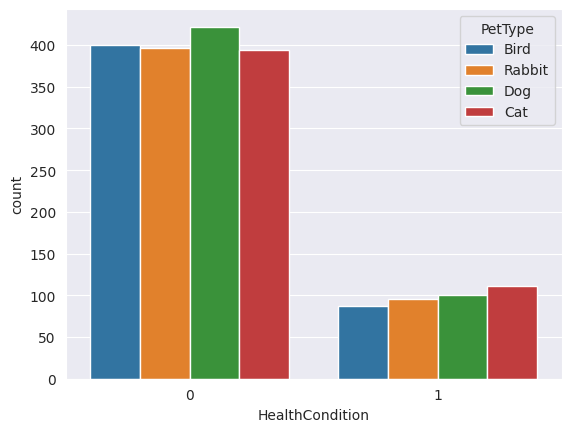

In [42]:
sns.countplot(x='HealthCondition',data=data, hue="PetType");

**Build machine learning modell**

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [7]:
ohe = OneHotEncoder()
le = LabelEncoder()
Size = data['Size']
Breed = data['Breed']
Color = data['Color']

In [19]:
#fit_tranform
data["size_encoded"] = le.fit_transform(Size)
data["breed_encoded"] = le.fit_transform(Breed)
data["color_encoded"] = le.fit_transform(Color)
#

In [20]:
#features engineering
features = ['breed_encoded', 'AgeMonths', 'color_encoded', 'size_encoded',
       'Vaccinated', 'HealthCondition', 'TimeInShelterDays', 'AdoptionFee',
       'PreviousOwner']
X = data[features]
y = data['AdoptionLikelihood']

In [22]:
X

,breed_encoded,AgeMonths,color_encoded,size_encoded,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner
0,2,131,3,0,1,0,27,140,0
1,5,73,4,0,0,0,8,235,0
2,0,136,3,1,0,0,85,385,0
3,2,97,4,2,0,0,61,217,1
4,5,123,2,0,0,0,28,14,1
...,...,...,...,...,...,...,...,...,...
2002,4,72,3,2,1,0,66,26,1
2003,5,124,1,2,1,1,59,150,0
2004,5,113,3,2,1,0,68,302,0
2005,1,12,2,0,1,0,59,478,0


In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest Tree Algorithm

In [24]:
pet_model= RandomForestClassifier(n_estimators=100, random_state=42)
pet_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
adopt_predict = pet_model.predict(X_val)

In [28]:
acc = accuracy_score(y_val, adopt_predict)
print(acc)

0.9378109452736318


Logistic Regression Algorithm


In [30]:
pet_model_lr = LogisticRegression(max_iter=1000)
pet_model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [31]:
adopt_predict_lr = pet_model_lr.predict(X_val)

In [32]:
acc_lr = accuracy_score(y_val, adopt_predict_lr)
print(acc_lr)

0.7114427860696517


XGBoost Algorithm

In [33]:
pet_model_xb = xgb.XGBClassifier()
pet_model_xb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [34]:
adopt_preidict_xb = pet_model_xb.predict(X_val)

In [35]:
acc_xb = accuracy_score(y_val, adopt_preidict_xb)
print(acc_xb)

0.9427860696517413
